In [40]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# Load dataset
df = pd.read_csv('mushrooms.csv')

# Show basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [42]:
# Frequency table for "odor"
odor_table = df['odor'].value_counts()
print(odor_table)

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


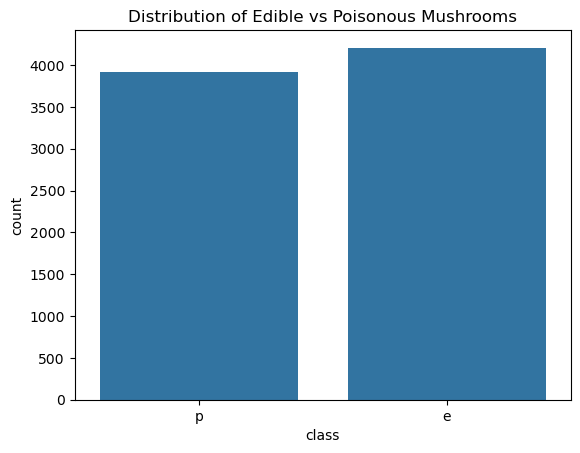

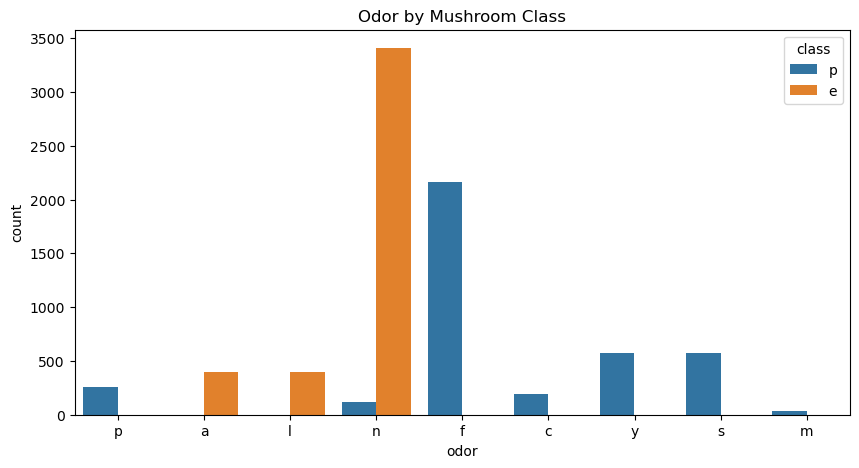

In [43]:
# Plot target distribution
sns.countplot(data=df, x='class')
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

# Plot distribution of odor
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='odor', hue='class')
plt.title('Odor by Mushroom Class')
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode all features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [45]:

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

Accuracy: 0.9476923076923077
Precision: 0.9439490445859873
Recall: 0.9475703324808185
F1 Score: 0.9457562220804084


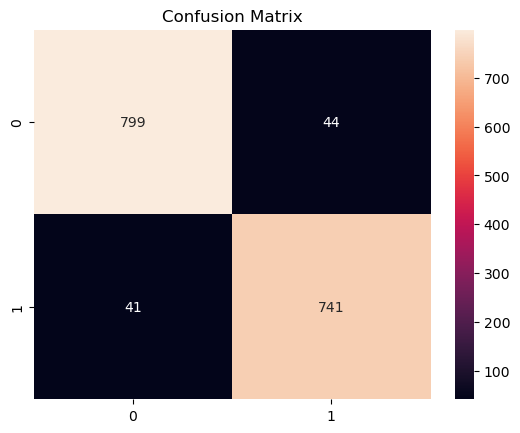

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [ ]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
print(classification_report(y_test, y_pred))
